In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('.\data\processed.cleveland.data', names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
df = df.replace('?', np.nan)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [37]:
df = df.dropna()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [35]:
# data from switzerland
df_ = pd.read_csv('.\data\processed.switzerland.data', names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
df_ = df_.replace('?', np.nan)
# df_.isnull().sum()
df_.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [34]:
# data from va
df_ = pd.read_csv('.\data\processed.va.data', names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
df_ = df_.replace('?', np.nan)
# df_.isnull().sum()
df_.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
28,56,1,4,120,100,0,0,120,1,1.5,2,0,7,1


In [41]:
# data from hungarian
df_ = pd.read_csv('.\data\processed.hungarian.data', names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
df_ = df_.replace('?', np.nan)
# df_.isnull().sum()
df_.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
205,47,1,4,150,226,0,0,98,1,1.5,2,0,7,1


In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column 
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

       Specs       Score
7    thalach  219.883557
11        ca  107.213553
9    oldpeak   98.505523
12      thal   70.520283
8      exang   39.119182
4       chol   38.167452
0        age   27.975233
3   trestbps   19.348090
2         cp   16.383180
6    restecg   13.026434
10     slope   10.178421
1        sex    7.511646


[0.09599985 0.0381189  0.07169953 0.09053169 0.09800861 0.02542439
 0.04035863 0.10454672 0.05966525 0.10032735 0.05864501 0.11563877
 0.10103529]


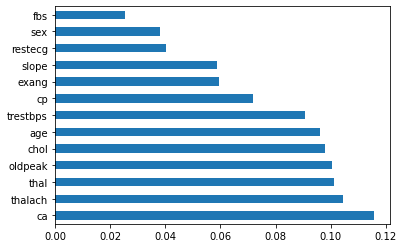

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

<AxesSubplot:>

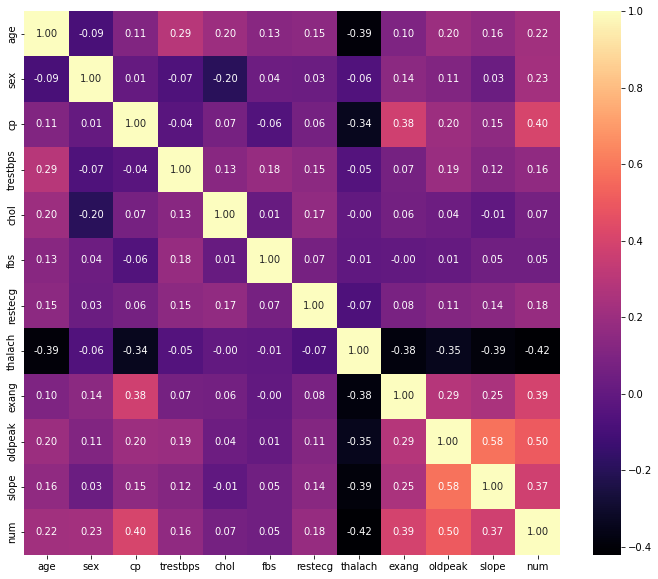

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [69]:
#cp - chest_pain_type
df.loc[df['cp'] == 0, 'cp'] = 'asymptomatic'
df.loc[df['cp'] == 1, 'cp'] = 'atypical angina'
df.loc[df['cp'] == 2, 'cp'] = 'non-anginal pain'
df.loc[df['cp'] == 3, 'cp'] = 'typical angina'

#restecg - rest_ecg_type
df.loc[df['restecg'] == 0, 'restecg'] = 'left ventricular hypertrophy'
df.loc[df['restecg'] == 1, 'restecg'] = 'normal'
df.loc[df['restecg'] == 2, 'restecg'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['slope'] == 0, 'slope'] = 'downsloping'
df.loc[df['slope'] == 1, 'slope'] = 'flat'
df.loc[df['slope'] == 2, 'slope'] = 'upsloping'

#thal - thalassemia_type
df.loc[df['thal'] == 0, 'thal'] = 'nothing'
df.loc[df['thal'] == 1, 'thal'] = 'fixed defect'
df.loc[df['thal'] == 2, 'thal'] = 'normal'
df.loc[df['thal'] == 3, 'thal'] = 'reversable defect'

In [73]:
df = pd.get_dummies(df, drop_first=False)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_4.0,...,slope_3.0,slope_flat,slope_upsloping,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,0,...,1,0,0,1,0,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,2,1,...,0,0,1,0,0,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1,1,...,0,0,1,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,1,0,0,1,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,1,1,...,0,0,1,1,0,0,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,1,0,...,0,0,1,1,0,0,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2,1,...,0,0,1,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,3,1,...,0,0,1,0,1,0,0,0,0,1


In [74]:
X = df.drop('num', axis = 1)
y = df['num']

In [89]:
y_train.values

array([2, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 1, 0, 0, 3, 0, 2, 0, 0, 2,
       1, 0, 0, 3, 0, 1, 0, 0, 3, 1, 1, 4, 0, 0, 3, 0, 2, 3, 1, 2, 0, 1,
       3, 0, 1, 0, 3, 0, 2, 4, 2, 1, 0, 3, 0, 1, 1, 0, 0, 4, 0, 0, 1, 1,
       0, 3, 0, 0, 0, 0, 0, 1, 2, 4, 1, 0, 2, 0, 0, 1, 3, 4, 0, 0, 1, 0,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 2, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 3, 2,
       0, 1, 2, 1, 3, 0, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1,
       3, 1, 3, 2, 3, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 3, 0, 0, 1, 0,
       0, 2, 2, 4, 2, 1, 0, 2, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 3, 3, 4, 4], dtype=int64)

In [90]:
from sklearn import preprocessing
tt = preprocessing.OneHotEncoder(y_train.values)
tt

TypeError: __init__() takes 1 positional argument but 2 were given

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
from sklearn import preprocessing
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

In [80]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred
# print(accuracy_score(y_test,y_pred))

array([0.91561181, 0.91561181, 0.91561181, 0.91561181, 0.91561181,
       0.91561181, 0.91561181, 0.91561181, 0.91561181, 0.91561181,
       0.91561181, 0.91561181, 0.91561181, 0.91561181, 0.91561181,
       0.91561181, 0.91561181, 0.91561181, 0.91561181, 0.91561181,
       0.91561181, 0.91561181, 0.91561181, 0.91561181, 0.91561181,
       0.91561181, 0.91561181, 0.91561181, 0.91561181, 0.91561181,
       0.91561181, 0.91561181, 0.91561181, 0.91561181, 0.91561181,
       0.91561181, 0.91561181, 0.91561181, 0.91561181, 0.91561181,
       0.91561181, 0.91561181, 0.91561181, 0.91561181, 0.91561181,
       0.91561181, 0.91561181, 0.91561181, 0.91561181, 0.91561181,
       0.91561181, 0.91561181, 0.91561181, 0.91561181, 0.91561181,
       0.91561181, 0.91561181, 0.91561181, 0.91561181, 0.91561181])

In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1e5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.5
